# Importing Libraries required for EDA

In [1]:
import pandas as pd  # Importing pandas library for data manipulation
import numpy as np   # Importing numpy library for data manipulation
import seaborn as sns # Importing seaborn for plotting graphs 
import matplotlib.pyplot as plt # Importing matplotlib for plotting graphs
from IPython.display import display # Importing Ipython.display to change notebook display setting
import warnings # Importing warning to control warnings
warnings.filterwarnings('ignore') # Setting warning to be ignored 
pd.options.display.max_columns = None # Resetting pandas column display setting to None
pd.options.display.max_rows = None # Resetting pandas row display setting to None

# Loading Dataset as a dataframe

In [2]:
loan_df = pd.read_csv('loan.csv', low_memory=False)  # Loading loan.csv dataset as a pandas dataframe
loan_df.head(4) # Displaying top 4 columns 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Summary

In [3]:
print(f"Dataset contains {loan_df.shape[0]} rows and {loan_df.shape[1]} columns\n") # Logging size of the dataset
print(loan_df.info())  # Logging Dataframe info

Dataset contains 39717 rows and 111 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [4]:
loan_df.describe() # Display summary of numberical data in the dataframe

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
# print number of null rows and columns

print(f"No. of null rows: {loan_df.isnull().all(axis=1).sum()}")  
print(f"No. of null columns: {loan_df.isnull().all(axis=0).sum()}")

No. of null rows: 0
No. of null columns: 54


# Data Cleaning

In [6]:
# Filter columns that contains nulls values more than 80%

null_cols = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
null_cols[ null_cols > 80 ]

mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24mths              100.00
avg_cur_bal     

In [7]:
# Dropping colums that contains more than 80% null values from the dataframe

loan_df.drop(null_cols[ null_cols > 80 ].index, axis=1, inplace=True)
loan_df.shape

(39717, 55)

In [8]:
# check dataframe for duplicates rows

loan_df.duplicated().value_counts()

False    39717
dtype: int64

In [9]:
# Find number of unique values in each vcolumn

loan_df.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [10]:
# Drop column that contains only 1 value, since it will not add any value to the EDA

loan_df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [11]:
# Drop behavioural columns that will not be considered for the EDA

behavioural_cols = ['desc', 'emp_title', 'title', 'member_id', 'url', 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 
                    'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'mths_since_last_delinq']
loan_df.drop(columns=behavioural_cols, inplace=True)
loan_df.shape

(39717, 31)

In [12]:
# Finding percentage of null or missing values

null_perc = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [13]:
# Dropping the null rows since it is very few
loan_df.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

null_perc = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

In [14]:
# Removing current loan status rows and it will not be considered


loan_df = loan_df[loan_df.loan_status != 'Current']

In [15]:
# Removing extra spaces present in term column

loan_df['term'] = loan_df.term.str.strip()
loan_df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [16]:
# Removing % symbol from int_rate and revol_util columns to convert it as a numerical value

loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%').astype(float)
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%').astype(float)

In [17]:
# Filling null values with 0 in emp_length column and converting it to numeric column

loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length']=loan_df['emp_length'].str.extract('(\d+)')
loan_df['emp_length'] = loan_df['emp_length'].apply(pd.to_numeric)


In [18]:
# Check distribution of loan_status value in the dataset

loan_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.856902
Charged Off    0.143098
Name: loan_status, dtype: float64

In [19]:
# Check distribution of verification_status value in the dataset

loan_df['verification_status'].value_counts(normalize=True, dropna=False)

Not Verified       0.422663
Verified           0.319647
Source Verified    0.257690
Name: verification_status, dtype: float64

In [20]:
# Check distribution of purpose value in the dataset

loan_df['purpose'].value_counts(normalize=True, dropna=False)

debt_consolidation    0.472092
credit_card           0.130408
other                 0.097690
home_improvement      0.074293
major_purchase        0.055842
small_business        0.045000
car                   0.038832
wedding               0.024266
medical               0.017527
moving                0.014701
house                 0.009484
vacation              0.009266
educational           0.008043
renewable_energy      0.002554
Name: purpose, dtype: float64

In [21]:
# Check distribution of pub_rec_bankruptcies value in the dataset

loan_df['pub_rec_bankruptcies'].value_counts(normalize=True, dropna=False)

0.0    0.958315
1.0    0.041549
2.0    0.000136
Name: pub_rec_bankruptcies, dtype: float64

In [22]:
# Convert issue_d column to datetime and derive year and month columns

loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['issue_d_year']=loan_df['issue_d'].dt.year
loan_df['issue_d_month']=loan_df['issue_d'].dt.month

# Univariate Analysis

### Data Distribution - total_pymnt column

In [23]:
# Logging Data Summary total_pymnt column

loan_df['total_pymnt'].describe()

count    36800.000000
mean     12000.654704
std       8854.568117
min          0.000000
25%       5572.034728
50%       9815.269906
75%      16303.695000
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

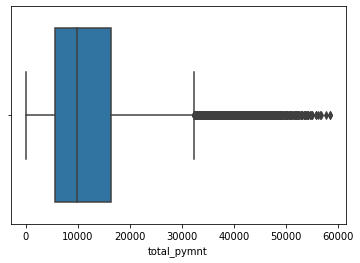

In [24]:
# Logging plot for total_pymnt column

sns.boxplot(loan_df['total_pymnt'])

### Data Distribution - annual_inc column

In [25]:
# Logging Data Summary annual_inc column

loan_df['annual_inc'].describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

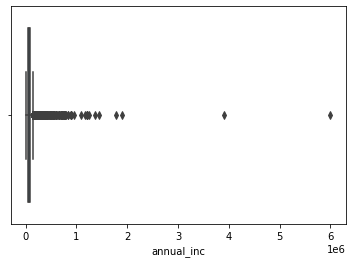

In [26]:
# Logging plot for annual_inc column

sns.boxplot(loan_df['annual_inc'])

#### Removing the outlier

<AxesSubplot:xlabel='annual_inc'>

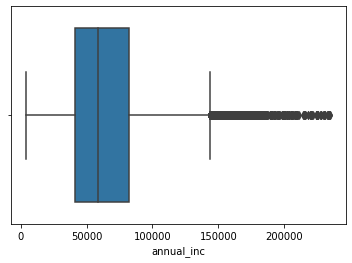

In [27]:
# Removing the outlier in annual_inc column

loan_df = loan_df[loan_df["annual_inc"] < loan_df["annual_inc"].quantile(0.99)]

# Logging plot for annual_inc column after removing the outlier

sns.boxplot(loan_df['annual_inc'])

## Loan Amount Distribution

In [28]:
# Logging Data Summary loan_amnt column

loan_df['loan_amnt'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36431.000000
mean     11061.808625
std       7285.523297
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%       9800.000000
75%      15000.000000
90%      21250.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

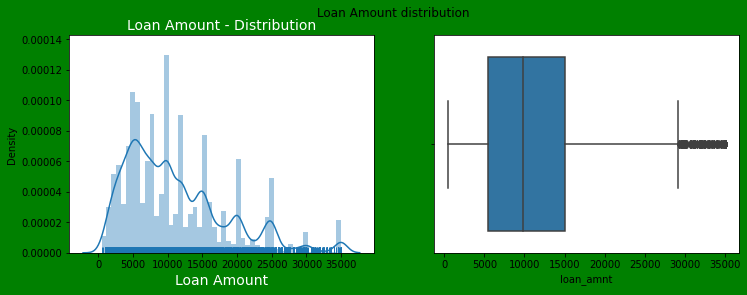

In [29]:
# Plotting graph to visualize Loan Amount Distribution

plt.figure(figsize=(12,4),facecolor='g')
plt.subplot(1,2,1)
ax = sns.distplot(loan_df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
plt.subplot(1,2,2)
sns.boxplot(loan_df['loan_amnt'])
plt.suptitle('Loan Amount distribution')
plt.show()

### Observations:
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

## Funded Amount Distribution

In [30]:
# Logging Data Summary funder_amnt column

loan_df['funded_amnt'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36431.000000
mean     10796.634048
std       7027.528046
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

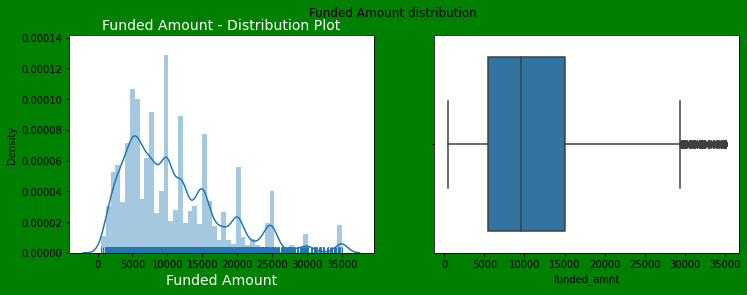

In [31]:
# Plotting graph to visualize Funded Amount distribution Distribution

plt.figure(figsize=(12,4),facecolor='g')
plt.subplot(1,2,1)
ax = sns.distplot(loan_df['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
plt.subplot(1,2,2)
sns.boxplot(loan_df['funded_amnt'])
plt.suptitle('Funded Amount distribution')
plt.show()

### Observations:
Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

## Investor Funded Amount Distribution

In [32]:
# Logging Data Summary funded_amnt_inv column

loan_df['funded_amnt_inv'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36431.000000
mean     10358.678993
std       6927.778864
min          0.000000
5%        2000.000000
10%       3000.000000
25%       5000.000000
50%       8997.008243
75%      14150.000000
90%      19975.000000
95%      24475.000000
99%      34470.533000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

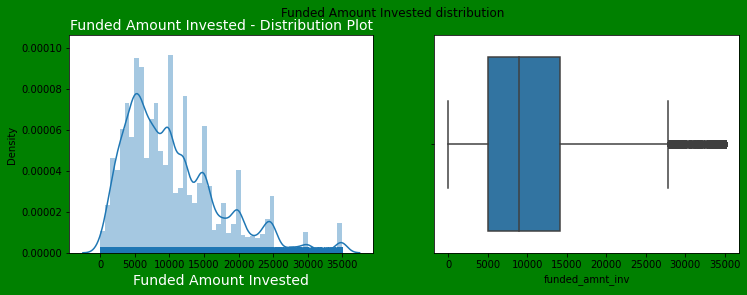

In [33]:
# Plotting graph to visualize Funded Amount Invested Distribution

plt.figure(figsize=(12,4),facecolor='g')
plt.subplot(1,2,1)
ax = sns.distplot(loan_df['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Invested - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Invested',fontsize=14,color='w')
plt.subplot(1,2,2)
sns.boxplot(loan_df['funded_amnt_inv'])
plt.suptitle('Funded Amount Invested distribution')
plt.show()

### Observations:
Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.

## Correlation Matrix

<AxesSubplot:>

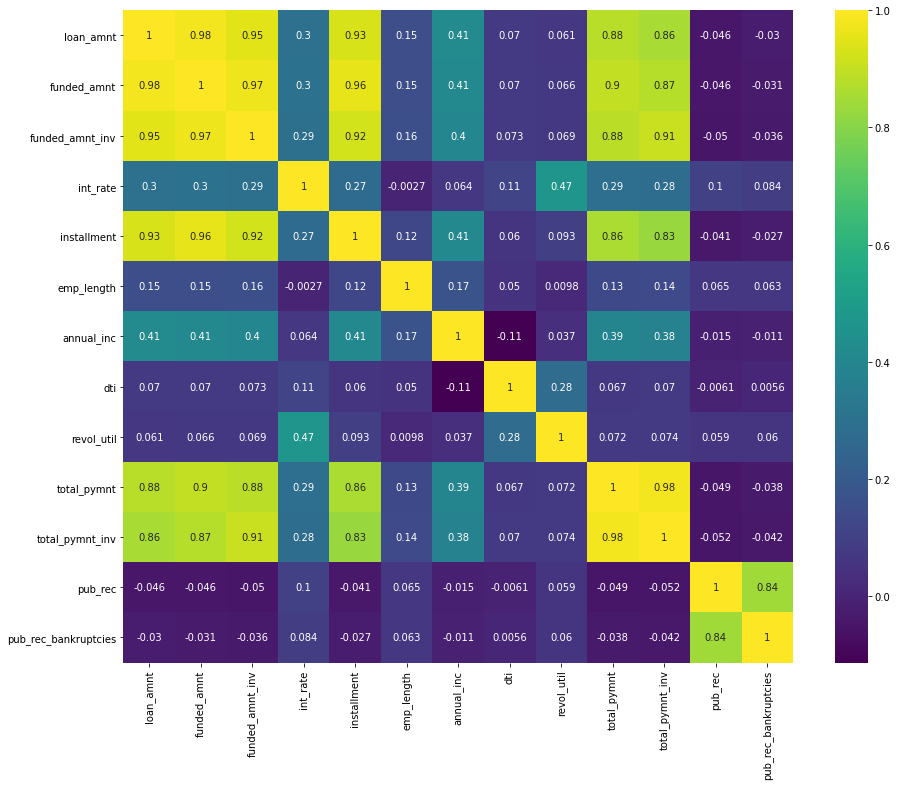

In [35]:
# Plotting a correlation matrix

plt.figure(figsize=(15, 12))
sns.heatmap(loan_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
                    'emp_length', 'annual_inc', 'dti', 'revol_util', 'total_pymnt', 'total_pymnt_inv',
                    'pub_rec', 'pub_rec_bankruptcies']].corr(), annot=True, cmap='viridis')

### Observations:
1. Loan amount, investor amount, funding amount are strongly correlated.
2. Debt to income ratio is negatively correlated with annual income.
3. Interest rate and Loan amount are moderately correlated.
4. Public Derogatory records and Bankruptcies and postively correlated.

## Loan Status - Distribution

Fully Paid     0.856551
Charged Off    0.143449
Name: loan_status, dtype: float64


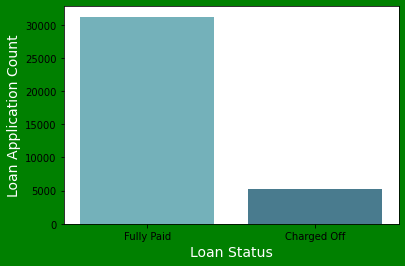

In [36]:
# Plotting graph to visualize Loan Status Distribution

plt.figure(figsize=(6,4),facecolor='g')
ax = sns.countplot(x="loan_status",data=loan_df, palette='GnBu_d')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w') 

print(loan_df['loan_status'].value_counts(normalize=True))

### Observations:
Majority of the loans are Fully paid and only about 15% of loans and getting charged off

## Purpose Of Loan - Distribution

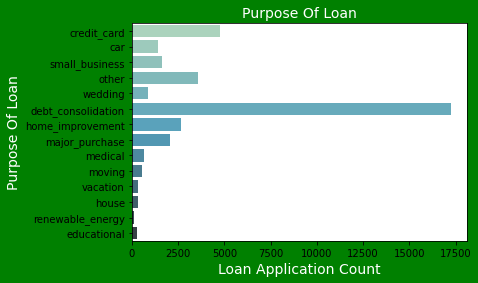

In [37]:
# Plotting graph to visualize Purpose of Loan Distribution

plt.figure(figsize=(6,4),facecolor='g')
ax = sns.countplot(y="purpose",data=loan_df, palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

### Observations :
Above plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
Number of chraged off count also high too for these loans.

## Home Ownership - Distribution

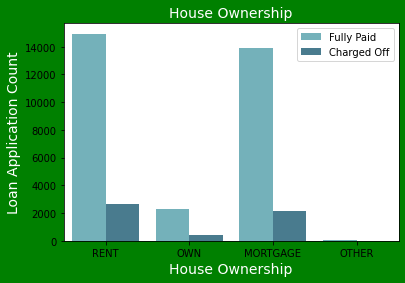

In [38]:
# Plotting graph to visualize Home Ownership Distribution

plt.figure(figsize=(6,4),facecolor='g')
ax = sns.countplot(x="home_ownership",data=loan_df, hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('House Ownership',fontsize=14,color='w')
ax.set_xlabel('House Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

### Observations :
Above plot shows that most of the applicants do not own a house and the chances of getting charged off is high for rented and mortgaged applicants

## Verification_status - Data Distribution

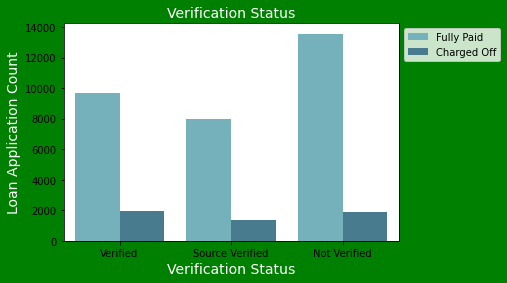

In [39]:
# Plotting graph to visualize Verification Status Distribution

plt.figure(figsize=(6,4),facecolor='g')
ax = sns.countplot(x="verification_status",data=loan_df, hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Verification Status',fontsize=14,color='w')
ax.set_xlabel('Verification Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')
p=loan_df['verification_status'].value_counts(normalize=True)

### Observations:
Getting charged of is similar across verfied and not verified applicants.

## Loan Paying Term - Data Distribution

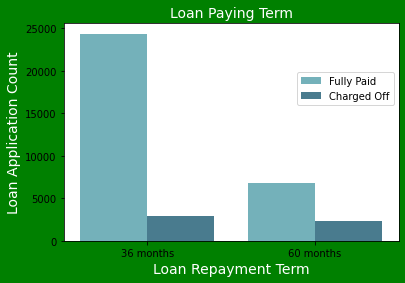

In [40]:
# Plotting graph to visualize Loan Paying Term Distribution

plt.figure(figsize=(6,4),facecolor='g')
ax = sns.countplot(x="term",data=loan_df,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 0.8))
plt.show()


### Observations :
Above plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
charged off as compared to applicants who had taken loan for 36 months.

## Annual Income - Data Distribution

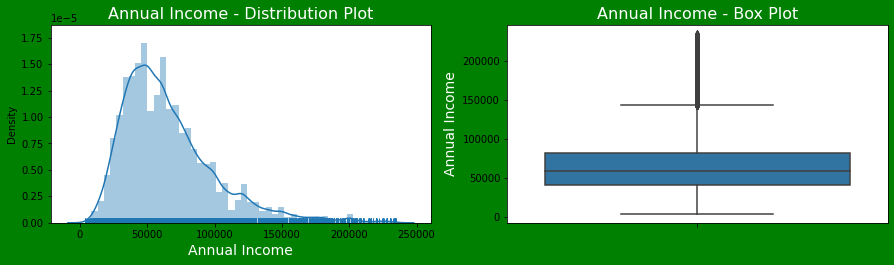

In [41]:
# Plotting graph to visualize Annual Income Distribution

plt.figure(figsize=(15,8),facecolor='g')
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_df['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan_df['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

### Observations:
Above plots show that most of the borrower's Annual incomes are in range of 40000- 80000

## Loan amount Data Distribution

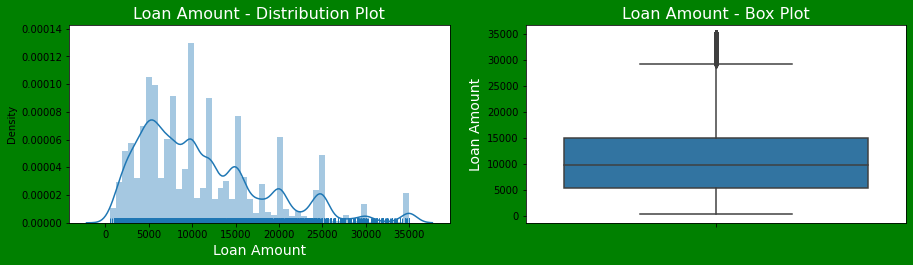

In [42]:
# Plotting graph to visualize Loan Amount Distribution

plt.figure(figsize=(15,8),facecolor='g')
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_df['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

### Observations :
Above plots show that most of the Loan amounts are in range of 5000 - 15000

## Intrest Rate Data Distribution

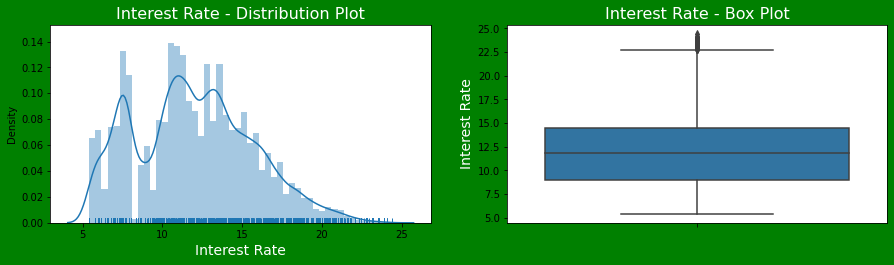

In [43]:
# Plotting graph to visualize Loan Amount Distribution

plt.figure(figsize=(15,8),facecolor='g')
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_df['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_df['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

### Observations :
Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

# Bivariate Analysis

## Get Derived columns for further bivariate analysis

In [44]:
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan_df['loan_amnt_cats'] = pd.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan_df['annual_inc_cats'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan_df['int_rate_cats'] = pd.cut(loan_df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan_df['dti_cats'] = pd.cut(loan_df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [45]:
# Function to plot graphs based on given input column

def get_plots(plot):
    column_dict = {'Annual Income': 'annual_inc_cats',
                   'Purpose of Loans' : 'purpose',
                    'Grades' : 'grade',
                    'Interest Rate' : 'int_rate_cats',
                    'Employment Length' : 'emp_length',
                    'Verification Status' : 'verification_status',
                    'Public Bankruptcy Records' : 'pub_rec_bankruptcies',
                    'Derogatory Public Record' : 'pub_rec'
        }
    df = loan_df.groupby([column_dict[plot], 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
    df['Total'] = df['Charged Off']  + df['Fully Paid'] 
    df['Chargedoff_Proportion'] = df['Charged Off'] / df['Total']
    df.sort_values('Chargedoff_Proportion', ascending=False)

    fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='g')
    ax1.set_title(f"{plot} vs Chargedoff Proportion" ,fontsize=15,color = 'w')
    if plot == 'Purpose of Loans':
        ax1=sns.barplot(x='Chargedoff_Proportion', y=column_dict[plot], data=df)
        ax1.set_ylabel(plot, fontsize=14, color='w')
        ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
        return plt
    ax1=sns.barplot(x=column_dict[plot], y='Chargedoff_Proportion', data=df)
    ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
    ax1.set_xlabel(plot, fontsize=14,color='w')        
    return plt

## Annual Income vs Chargedoff Proportion

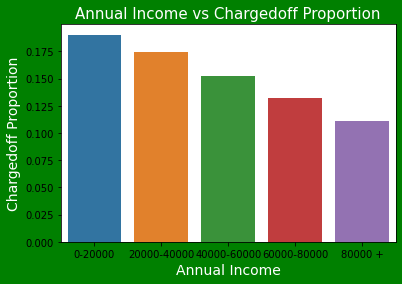

In [46]:
# Plotting graph to visualize Annual Income vs Chargedoff Proportion

plt = get_plots('Annual Income')
plt.show()

### Observations:
1. Income range 80000+  has less chances of charged off.
2. Income range 0-20000 has high chances of charged off.
3. Notice that with increase in annual income charged off proportion got decreased. 

## Purpose of Loans vs Chargedoff Proportion

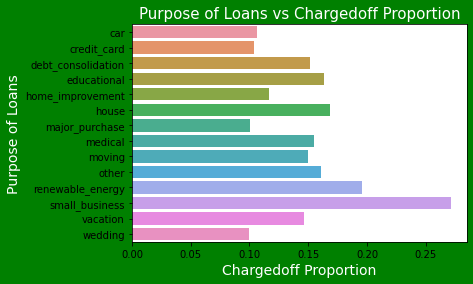

In [47]:
# Plotting graph to visualize Loans vs Chargedoff Proportion

plt = get_plots('Purpose of Loans')
plt.show()

### Observations:
1. small Business applicants have high chances of getting charged off.
2. wedding and car charged off proportion is better as compare to other categories.

## Grades vs Chargedoff Proportion

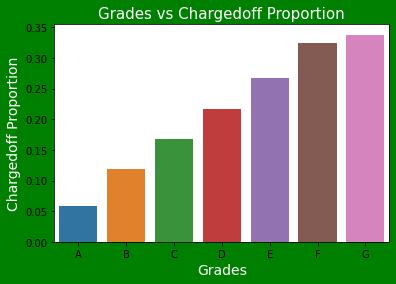

In [49]:
# Plotting graph to visualize Grades vs Chargedoff Proportion

plt = get_plots('Grades')
plt.show()

### Observations:
1. Grade "A" has very less chances of charged off.
2. Grade "F" and "G" have very high chances of charged off.
3. Chances of charged of is increasing with grade moving from "A" towards "G"

## Interest Rate vs Chargedoff Proportion

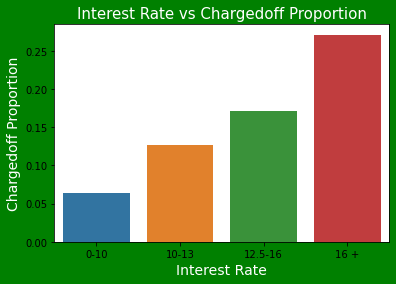

In [50]:
# Plotting graph to visualize Interest Rate vs Chargedoff Proportion

plt = get_plots('Interest Rate')
plt.show()

### Observations:
1. Interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
2. Interest rate more than 16% has good chances of charged off as compared to other category intrest rates.
3. Charged off proportion is increasing with higher intrest rates.

## Employment Length vs Chargedoff Proportion

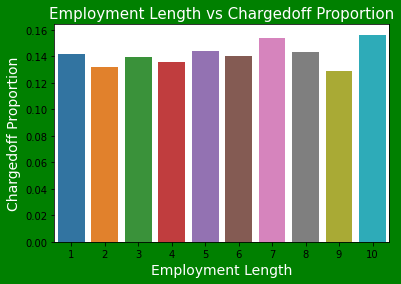

In [51]:
# Plotting graph to visualize Employment Length  vs Chargedoff Proportion

plt = get_plots('Employment Length')
plt.show()

### Observations:
1. Chargedoff proportion is similar across all levels of employment experience.

## Verification Status vs Chargedoff Proportion

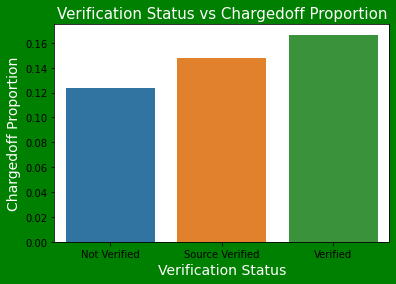

In [52]:
# Plotting graph to visualize Verification Statusvs Chargedoff Proportion

plt = get_plots('Verification Status')
plt.show()

### Observations:
1. There is no much difference in the chargedoff  proportion

## Public Bankruptcy Records vs Chargedoff Proportion

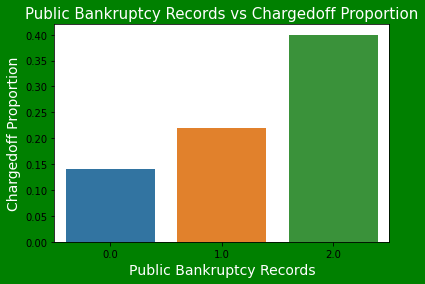

In [53]:
# Plotting graph to visualize Public Bankruptcy Records vs Chargedoff Proportion

plt = get_plots('Public Bankruptcy Records')
plt.show()

### Observations:
1. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
2. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
3. Not known is the column for which we don't have any information abount borrower.
4. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

## Derogatory Public Record against Chargedoff_Proportion

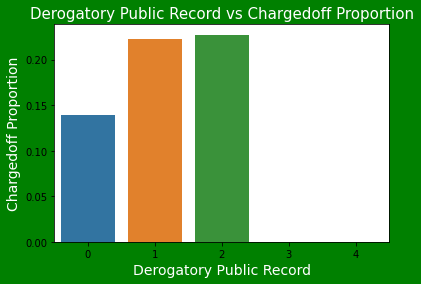

In [54]:
# Plotting graph to visualize Derogatory Public Record vs Chargedoff Proportion

plt = get_plots('Derogatory Public Record')
plt.show()

### Observations:
1. Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
2. pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

## Bivariate Analysis - Purpose vs Interest Rate

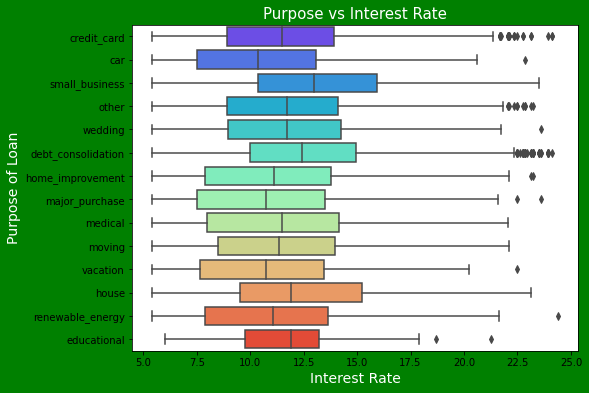

In [55]:
# Plotting graph to visualize relationship between Purpose vs Interest Rate

plt.figure(figsize=(8,6),facecolor='g')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_df,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

### Observations:
1. The above plot clearly states that avearge intrest rate is highest for small business purpose.
2. Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
3. Debt consolidation is 2nd where borrowers had to pay more interest rate.

## Bivariate Analysis - Term of loan vs Interest Rate

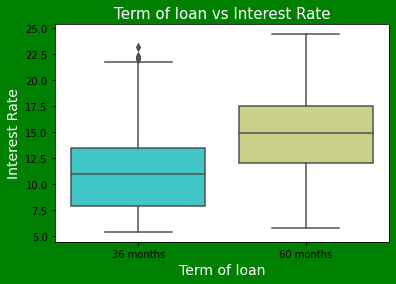

In [56]:
# Plotting graph to visualize relationship between Term of loan vs Interest Rate

plt.figure(figsize=(6,4),facecolor='g')
ax = sns.boxplot(y='int_rate', x='term', data =loan_df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

### Observations:
1. From the above plot it is clear that avearge intrest rate is higher for 60 months loan term.
2. Most of the loans issued for longer term had higher intrest rates for repayement.

## Bivariate Analysis - dti vs Interest Rate

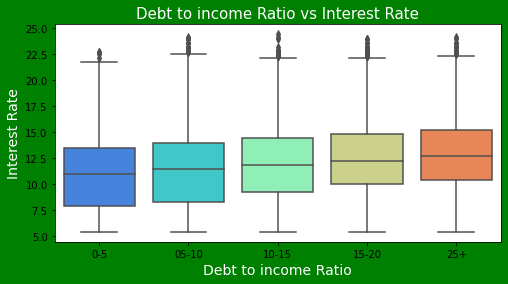

In [57]:
# Plotting graph to visualize relationship between dti vs Interest Rate

plt.figure(figsize=(8,4),facecolor='g')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan_df ,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')
plt.show()

### Observations:
1. If your DTI is low enough you may get a lower interest rate.
2. Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

## Variation of annual income across every grades.

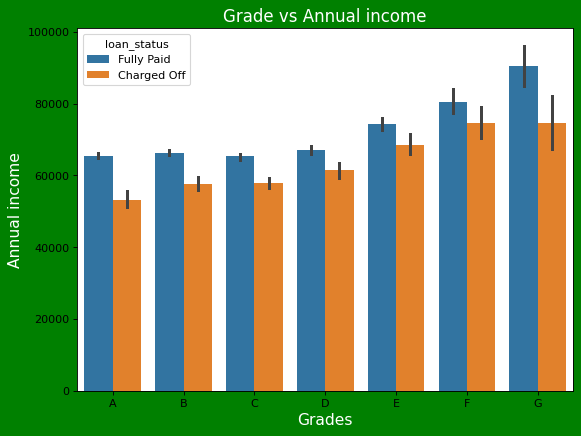

In [58]:
# Plotting graph to visualize Variation of annual income across every grades.

plt.figure(figsize=(8,6), dpi=80, facecolor='g', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan_df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

### Observations:
1. From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
2. who'paid fully' for each and every grade (i.e. at same interest range)